<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/CNN_Autoencoder_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

Using TensorFlow backend.


In [0]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

(x_train.shape, x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Flatten())
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(7*7*32, activation='relu'))
                
autoencoder.add(Reshape((7, 7, 32)))

# Decoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                50208     
_________________________________________________________________
dense_4 (Dense)              (None, 1568)              51744     
__________

In [0]:
encoder = Model(inputs=autoencoder.input, output=autoencoder.layers[-8].output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                50208     
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2324 - val_loss: 0.1523
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1372 - val_loss: 0.1248
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1221 - val_loss: 0.1173
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1160 - val_loss: 0.1136
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1127 - val_loss: 0.1109
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1103 - val_loss: 0.1089
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1087 - val_loss: 0.1079
Epoch 8/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1074 - val_loss: 0.1065
Epoch 9/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1065 - val_loss: 0.1

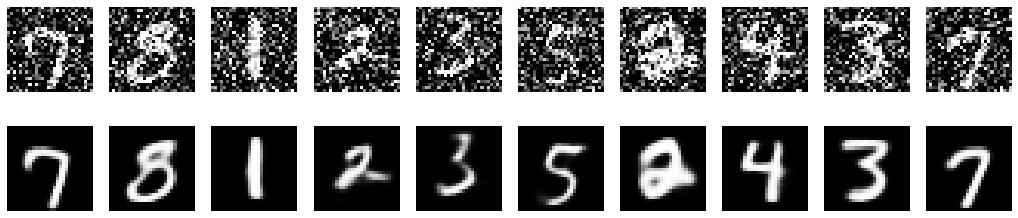

In [0]:
num_images = 10
np.random.seed(666)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)
x_test_denoised = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [0]:
(_, _), (x_test, x_label) = mnist.load_data()
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [0]:
encoded_imgs = encoder.predict(x_test)

In [0]:
encoded_imgs[0]

array([2.6615684 , 0.        , 1.0068789 , 0.04860403, 0.        ,
       0.        , 1.0345244 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.4285674 , 1.8449776 , 3.9158828 ,
       1.2349676 , 0.72065276, 4.350664  , 0.7301899 , 0.44837725,
       0.        , 0.        , 0.38154843, 0.4128167 , 2.9345844 ,
       1.4950163 , 4.651408  , 0.        , 2.2012944 , 0.        ,
       0.        , 1.8775896 ], dtype=float32)

In [0]:
X = np.vstack([encoded_imgs[x_label==i]
               for i in range(10)])
y = np.hstack([x_label[x_label==i]
               for i in range(10)])

In [0]:
import numpy as np
from sklearn.manifold import TSNE
digits_proj = TSNE(n_components=2).fit_transform(X)

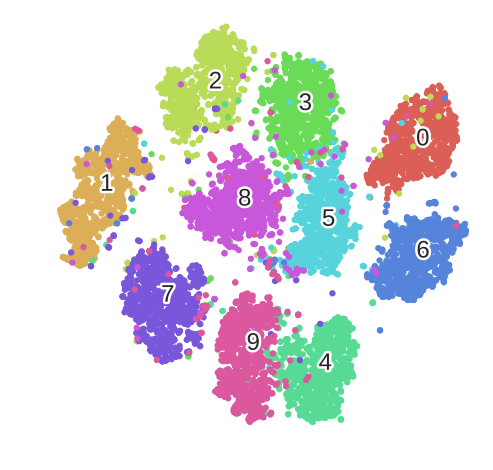

In [0]:
import matplotlib.patheffects as PathEffects
scatter(digits_proj, y)
!mkdir ./images/
plt.savefig('./images/digits_tsne-generated.png', dpi=120)

In [0]:
(_, _), (x_test, x_label) = mnist.load_data()
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape((len(x_test), 28, 28, 1))
X = np.vstack([encoded_imgs[x_label==i]
               for i in range(10)])
y = np.hstack([x_label[x_label==i]
               for i in range(10)])

In [0]:
import numpy as np
from sklearn.manifold import TSNE
digits_proj = TSNE(n_components=2).fit_transform(X)

(<matplotlib.figure.Figure at 0x7f77e5837cf8>,
 [Text(51.11,45.0312,'0'),
  Text(66.6727,-17.3336,'1'),
  Text(28.1909,-23.4785,'2'),
  Text(2.73881,-59.0487,'3'),
  Text(-66.1968,3.29671,'4'),
  Text(-38.392,-46.6749,'5'),
  Text(16.5596,23.8089,'6'),
  Text(-17.7184,57.4035,'7'),
  Text(-15.1012,-11.0896,'8'),
  Text(-44.4371,26.8287,'9')])

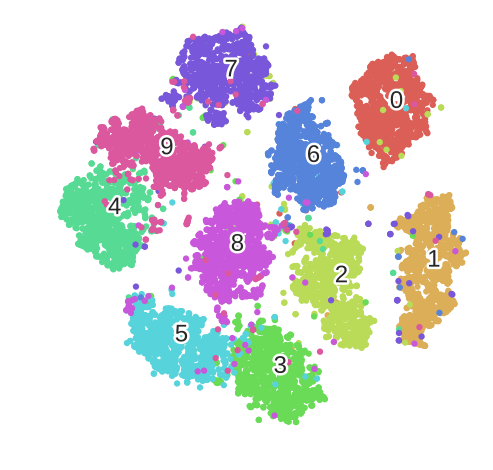

In [0]:
import matplotlib.patheffects as PathEffects
scatter(digits_proj, y)